#1. BINARY CLASSIFICATION - PLAY TENNIS

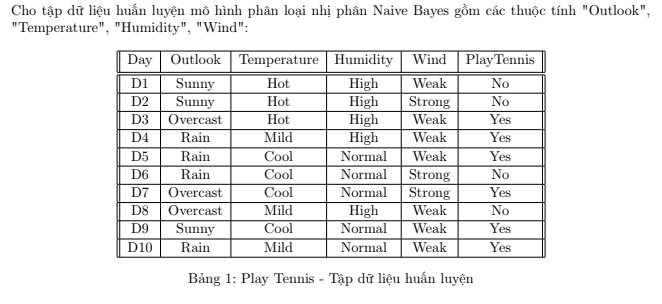

In [22]:
#Create data
import numpy as np
def create_train_data():
  Outlook = ["Sunny", "Overcast", "Rain"]
  Temperature = ["Hot", "Mild", "Cool"]
  Humidity = ["High", "Normal"]
  Wind = ["Weak", "Strong"]
  Play = ["No", "Yes"]
  data = [
        [Outlook[0], Temperature[0], Humidity[0], Wind[0], Play[0]],
        [Outlook[0], Temperature[0], Humidity[0], Wind[1], Play[0]],
        [Outlook[1], Temperature[0], Humidity[0], Wind[0], Play[1]],
        [Outlook[2], Temperature[1], Humidity[0], Wind[0], Play[1]],
        [Outlook[2], Temperature[2], Humidity[1], Wind[0], Play[1]],
        [Outlook[2], Temperature[2], Humidity[1], Wind[1], Play[0]],
        [Outlook[1], Temperature[2], Humidity[1], Wind[1], Play[1]],
        [Outlook[1], Temperature[1], Humidity[0], Wind[0], Play[0]], # Corrected line
        [Outlook[0], Temperature[2], Humidity[1], Wind[0], Play[1]],
        [Outlook[2], Temperature[1], Humidity[1], Wind[0], Play[1]]
    ]
  return np.array(data)
train_data = create_train_data()
print(train_data)

[['Sunny' 'Hot' 'High' 'Weak' 'No']
 ['Sunny' 'Hot' 'High' 'Strong' 'No']
 ['Overcast' 'Hot' 'High' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Strong' 'No']
 ['Overcast' 'Cool' 'Normal' 'Strong' 'Yes']
 ['Overcast' 'Mild' 'High' 'Weak' 'No']
 ['Sunny' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'Normal' 'Weak' 'Yes']]


In [3]:
train_data.shape

(9, 5)

In [37]:
#P("Play Tennis" = "Yes") and P("Play Tennis" = "No")
def compute_prior_probability(train_data):
  y_unique = ["No", "Yes"]
  prior_probability = np.zeros(len(y_unique))
  for i in range(0,len(y_unique)):
    prior_probability[i]=len(np.where(train_data[:,4] == y_unique[i])[0])/len(train_data)
  return prior_probability

prior_probablity = compute_prior_probability(train_data)
print("P(“Play Tennis” = No)", prior_probablity[0])
print("P(“Play Tennis” = Yes)", prior_probablity[1])

P(“Play Tennis” = No) 0.4
P(“Play Tennis” = Yes) 0.6


##Xác xuất có điều kiện

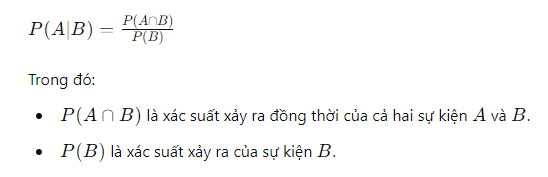

In [38]:
import numpy as np

def compute_conditional_probability(train_data):
  y_unique = ["No", "Yes"]
  conditional_probability = []
  list_x_name = []
  for i in range(0,train_data.shape[1]-1):
    x_unique = np.unique(train_data[:,i])
    print("x_unique", x_unique)

    list_x_name.append(x_unique)

    x_conditional_probability = np.zeros((len(y_unique),len(x_unique)))
    for j in range(0,len(y_unique)):
      for k in range(0,len(x_unique)):
        x_conditional_probability[j,k]= len(np.where((train_data[:,i] == x_unique[k]) & (train_data[:,4] == y_unique[j]))[0])/len(np.where(train_data[:,4] == y_unique[j])[0])

    conditional_probability.append(x_conditional_probability)
  return conditional_probability, list_x_name


In [39]:
_, list_x_name = compute_conditional_probability(train_data)
list_x_name

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']


[array(['Overcast', 'Rain', 'Sunny'], dtype='<U8'),
 array(['Cool', 'Hot', 'Mild'], dtype='<U8'),
 array(['High', 'Normal'], dtype='<U8'),
 array(['Strong', 'Weak'], dtype='<U8')]

In [10]:
#tính trả về index tương ứng với feature name
def get_index_from_value(feature_name, list_features):
  return np.where(list_features == feature_name)[0][0]
outlook = list_x_name[0]
i1 = get_index_from_value("Overcast", outlook)
i2 = get_index_from_value("Rain", outlook)
i3 = get_index_from_value("Sunny", outlook)
print(i1,i2,i3)

0 1 2


In [49]:
conditional_probability[1]

array([[0.25      , 0.25      , 0.5       ],
       [0.33333333, 0.5       , 0.16666667]])

In [47]:
train_data = create_train_data()
conditional_probability, list_x_name  = compute_conditional_probability(train_data)
# Compute P("Outlook"="Sunny"|Play Tennis"="Yes")
x1=get_index_from_value("Cool",list_x_name[1])
print("P('Outlook'='Sunny'|Play Tennis'='Yes') = ", np.round(conditional_probability[1][1, x1],2))

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']
P('Outlook'='Sunny'|Play Tennis'='Yes') =  0.5


In [41]:
def train_naive_bayes(data):
    prior_probability = compute_prior_probability(train_data)

    # Step 2: Calculate Conditional Probability
    conditional_probability, list_x_name  = compute_conditional_probability(train_data)

    return prior_probability,conditional_probability, list_x_name

data = create_train_data()
prior_probability,conditional_probability, list_x_name = train_naive_bayes(data)

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']


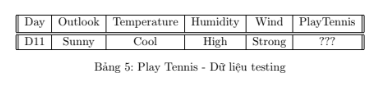

In [42]:
def predict_play_tennis(X, list_x_name, prior_probability, conditional_probability):

    x1=get_index_from_value(X[0],list_x_name[0])
    x2=get_index_from_value(X[1],list_x_name[1])
    x3=get_index_from_value(X[2],list_x_name[2])
    x4=get_index_from_value(X[3],list_x_name[3])

    p0=prior_probability[0] \
    *conditional_probability[0][0,x1] \
    *conditional_probability[1][0,x2] \
    *conditional_probability[2][0,x3] \
    *conditional_probability[3][0,x4]

    p1=prior_probability[1]\
    *conditional_probability[0][1,x1]\
    *conditional_probability[1][1,x2]\
    *conditional_probability[2][1,x3]\
    *conditional_probability[3][1,x4]

    # print(p0, p1)

    if p0>p1:
        y_pred=0
    else:
        y_pred=1

    return y_pred
X = ["Sunny", "Cool", "High", "Strong"]
data = create_train_data()
prior_probability, conditional_probability, list_x_name = train_naive_bayes(data)
pred = predict_play_tennis(X, list_x_name, prior_probability, conditional_probability)

if (pred):
  print("Ad should go!")
else:
  print("Ad should not go!")

x_unique ['Overcast' 'Rain' 'Sunny']
x_unique ['Cool' 'Hot' 'Mild']
x_unique ['High' 'Normal']
x_unique ['Strong' 'Weak']
Ad should not go!
